In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## <u>*__Step 1 questions could be simplified into:__* </u>
1. Top countries for each metric:
    - GDP: Incomes
    - Family: social support
    - Health: life expectancy
    - Freedom: freedom
    - Trust: corruption
    - Generosity: lowest generosity

2. Compare ranks and scores between 2015 and 2016, and between 2016 and 2017.
3. Find the top countries that either gained or lost happiness scores.


## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
df15 = pd.read_csv('2015.csv')
df16 = pd.read_csv('2016.csv')
df17 = pd.read_csv('2017.csv')
df18 = pd.read_csv('2018.csv')
df19 = pd.read_csv('2019.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
print('2015:', df15.shape)
print('2016:', df16.shape)
print('2017:', df17.shape)
print('2018:', df18.shape)
print('2019:', df19.shape)


2015: (158, 12)
2016: (157, 13)
2017: (155, 12)
2018: (156, 9)
2019: (156, 9)


In [4]:
df15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
df17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


- With an initial feel of the first 3 datasets:
    - Family is an indication of social support.
    - Economy reflects the overall income of the countries, or maybe personal incomes, which could tell us more about the living standards.
    - Trusting the government to not exploit funds or have corruption and care for the society's well-being plays a role on citizens' happiness.
    - The Region column seems to be of little value as it doesn't seem to be changing the story of the data, which could mean its just there for categorical puposes, which seems to not be required later on.
    - Dystopia Residual looks like a crucial column although it is not very clear what the meaning behind it is, must check the source for explanations.
    - I would like to also figure out what "Confidence Interval", "Generosity", and "Freedom" really entails to better formulate an understanding.
    - Most of the core values are numerical values, specifically float, however, it is not very clear how it translates to the naming of the column, for example, why is there a numerical value in the column "Family"? The meaning behind these measurements needs to be explored.

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [7]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [8]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [9]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [10]:
print('2015:', df15.shape)
print('2016:', df16.shape)
print('2017:', df17.shape)
print('2018:', df18.shape)
print('2019:', df19.shape)

2015: (158, 12)
2016: (157, 13)
2017: (155, 12)
2018: (156, 9)
2019: (156, 9)


In [11]:
df15.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [12]:
df16.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [13]:
df17.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [14]:
df18.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [15]:
df19.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [16]:
print('2015:', df15.columns, '\n')
print('2016:', df16.columns, '\n')
print('2017:', df17.columns, '\n')

2015: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') 

2016: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 

2017: Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object') 



In [17]:
print('2018:', df18.columns, '\n')
print('2019:', df19.columns, '\n')

2018: Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object') 

2019: Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object') 



The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

## <u>*__The types in the "World Happiness" dataset are:__* </u>



In [18]:
datatypes = {
    'Type': {'Country': 'Qualitative', 'Region': 'Qualitative', 'Happiness Rank': 'Quantitive', 'Happiness Score': 'Quantitive',
       'Standard Error': 'Quantitive', 'Economy (GDP per Capita)': 'Quantitive', 'Family': 'Quantitive',
       'Health (Life Expectancy)': 'Quantitive', 'Freedom': 'Quantitive', 'Trust (Government Corruption)': 'Quantitive',
       'Generosity': 'Quantitive', 'Dystopia Residual': 'Quantitive', 'Lower Confidence Interval': 'Quantitive', 'Upper Confidence Interval': 'Quantitive',
       'Whisker.low': 'Quantitive', 'Whisker.high': 'Quantitive'},
    
    'Category': {'Country': 'Nominal', 'Region': 'Nominal', 'Happiness Rank': 'Descrete', 'Happiness Score': 'Continuous',
       'Standard Error': 'Continuous', 'Economy (GDP per Capita)': 'Continuous', 'Family': 'Continuous',
       'Health (Life Expectancy)': 'Continuous', 'Freedom': 'Continuous', 'Trust (Government Corruption)': 'Continuous',
       'Generosity': 'Continuous', 'Dystopia Residual': 'Continuous', 'Lower Confidence Interval': 'Continuous', 'Upper Confidence Interval': 'Continuous',
       'Whisker.low': 'Continuous', 'Whisker.high': 'Continuous'}
}

df_datatypes = pd.DataFrame(datatypes)
df_datatypes

,Type,Category
Country,Qualitative,Nominal
Region,Qualitative,Nominal
Happiness Rank,Quantitive,Descrete
Happiness Score,Quantitive,Continuous
Standard Error,Quantitive,Continuous
Economy (GDP per Capita),Quantitive,Continuous
Family,Quantitive,Continuous
Health (Life Expectancy),Quantitive,Continuous
Freedom,Quantitive,Continuous
Trust (Government Corruption),Quantitive,Continuous


### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

##### *- 2015 dataset*
- The original source of the data for the 2015 report: https://worldhappiness.report/ed/2015/

- "Our work is public. Data for Figure 2.1 for each corresponding year are freely downloadable. The survey measure of SWB (Subjective Well-being) is from the Gallup World Poll (GWP). Please reference the report accordingly (see Citation)." - World Happiness Report 2015

- Citation: Helliwell, John F., Richard Layard, and Jeffrey Sachs, eds. 2015. World Happiness Report 2015. New York: Sustainable Development Solutions Network.

##### *- 2016 dataset*
- The original source of the data for the 2016 report: https://worldhappiness.report/ed/2016/

- "Our work is public. Data for Figure 2.1 for each corresponding year are freely downloadable. The survey measure of SWB (Subjective Well-being) is from the Gallup World Poll (GWP). Please reference the report accordingly (see Citation)." - world Happiness Report 2016

- Citation: Helliwell, J., Layard, R., & Sachs, J. (2016). World Happiness Report 2016, Update (Vol. I). New York: Sustainable Development Solutions Network.

##### *- 2017 dataset*
- The original source of the data for the 2017 report: https://worldhappiness.report/ed/2017/

- "Our work is public. Data for Figure 2.1 for each corresponding year are freely downloadable. The survey measure of SWB (Subjective Well-being) is from the Gallup World Poll (GWP). Please reference the report accordingly (see Citation)." - World Happiness Report 2017

- Citation: Helliwell, J., Layard, R., & Sachs, J. (2017). World Happiness Report 2017, New York: Sustainable Development Solutions Network.

##### *- 2018 dataset*
- The original source of the data for the 2018 report: https://worldhappiness.report/ed/2018/

- "Our work is public. Data for Figure 2.1 for each corresponding year are freely downloadable. The survey measure of SWB (Subjective Well-being) is from the Gallup World Poll (GWP). Please reference the report accordingly (see Citation)." - World Happiness Report 2018

- Citation: Helliwell, J., Layard, R., & Sachs, J. (2018). World Happiness Report 2018, New York: Sustainable Development Solutions Network.

##### *- 2019 dataset*
- The original source of the data for the 2019 report: https://worldhappiness.report/ed/2019/

- "Our work is public. Data for Figure 2.1 for each corresponding year are freely downloadable. The survey measure of SWB (Subjective Well-being) is from the Gallup World Poll (GWP). Please reference the report accordingly (see Citation)." - World Happiness Report 2019

- Citation: This publication may be reproduced using the following reference: Helliwell, J., Layard, R., & Sachs, J. (2019). World Happiness Report 2019, New York: Sustainable Development Solutions Network.

##### *- Conclusion:*
- All datasets in this use case are public, and from globaly acknowledged publishers. The data was collected in collaboration with Gallup, Inc. Gallup is a multinational analytics and advisory company with an 89 years of experience in this field. Other partnerships involved in this are globaly renowned research institutes such as Oxford Wellbeing Research Centre, UN Sustainable Development Solutions Network, and the WHR’s Editorial Board. It is safe to assume that this data is reliable.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

- The datasets cover the years: 2015, 2016, 2017, 2018, and 2019. These years cover the period of interest as specified by the problem statement.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


* The consistency of the data overall is very good. However, it has some minor inconsistencies with the header namings, and a region column dropped post 2016 datasets. Although that is the case, at further inspection, these minor inconsistencies do not hinder the extraction of insights as the values of the datasets corresponds well with each dataset, and this applies to the columns with name differences, as they still reflect the same expected values, which with renaming, wont affect the analysis.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [146]:
df15.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [148]:
df16.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [135]:
df19.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [37]:
df19.head(0)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [132]:
df17.head(0)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


In [181]:
df17_new = df17.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'])
df17_new.columns = ['Country', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [182]:
df17_new.head(0)

,Country,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [168]:
df16_new = df16.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'])
df16_new.columns = ['Country', 'Region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']
df16_new.head(0)

,Country,Region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity


In [171]:
df15_new = df15.drop(columns=['Standard Error', 'Dystopia Residual'])
df15_new.columns = ['Country', 'Region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']
df15_new.head(0)

,Country,Region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity


In [199]:
df18.rename(columns={'Country or region': 'Country'}, inplace=True)
df19.rename(columns={'Country or region': 'Country'}, inplace=True)

In [185]:
df15_new['Year'] = 2015
df16_new['Year'] = 2016
df17_new['Year'] = 2017
df18['Year'] = 2018
df19['Year'] = 2019

In [ ]:
# making a dictionary out of every possible Region and Country in the datasets with the Region column
# to be used to add the 'Region' Column to the datasets that dont have it
regions = dict(zip(df15_new['Country'], df15_new['Region']))
regions16 = dict(zip(df16_new['Country'], df16_new['Region']))
missing_regions = {'Trinidad':'Latin America and Caribbean', 'Gambia':'Sub-Saharan Africa'}
regions.update(regions16)
regions.update(missing_regions)
regions

In [296]:
# creating a 'Region' column in the data frames that dont have it, and filling the values based on the "Country and Regions dictionary"
# if country match in each dataframe, then it is the same region
def locfun(country):
    for key in regions:
        if key in country:
            return regions.get(key)

    # return university_loc.get(country)

df17_new['Region'] = df17_new['Country'].apply(locfun)
df18['Region'] = df18['Country'].apply(locfun)
df19['Region'] = df19['Country'].apply(locfun)

In [297]:
df19

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019,Sub-Saharan Africa
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019,Sub-Saharan Africa
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019,Southern Asia
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019,Sub-Saharan Africa


*the data sets from the years 2018 and 2019 are not relevant to our problem statement 2, therefore, they wont be included in the analysis to answer question 2.
However, all the datasets fits the narative of the other defined problem statements:
- 2015, 2016, and 2017 will be included in all of the problem statements.
- 2018, and 2019 will be excluded from the second problem statement.

*The columns seem to be of relevant Data that will contribute to finding the answers, except:
- Lower Confidence Interval	
- Upper Confidence Interval
- Whisker.high
- Whisker.low
- Standard Error
- and maybe Dystopia Residual

*These columns do not seem at first glance that they will be relatable to our analysis, dropping them would be smarter for our current scope.

*after dropping said columns, I will merge all the datasets with creating a new 'Year' category column for each dataset, and adding 'Region' column for datasets that are missing it.

In [298]:
merged_dfs = pd.concat([df15_new, df16_new, df17_new, df18, df19])#, keys=['df15', 'df16', 'df17', 'df18', 'df19'])

In [299]:
merged_dfs

,Country,Region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,Sub-Saharan Africa,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
152,Tanzania,Sub-Saharan Africa,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
153,Afghanistan,Southern Asia,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
154,Central African Republic,Sub-Saharan Africa,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [300]:
merged_dfs.duplicated().sum()

0

In [301]:
merged_dfs.duplicated(subset='Region').sum()

# region columns having duplicates makes sense and will not be considered a requirement for Uniqueness as multiple countries can be in one region of the world.

772

In [302]:
merged_dfs.duplicated(subset='Overall rank').sum()

# will also be ignored as ranks can be equal depending on the score
# moving forward, I will also assume that any "score" or "Rank" data duplicates are accepted

624

*No duplicated rows in merged dataframe

In [20]:
# go to delete duplicates columns

*No columns need to be removed due to duplication as the information they portray for each row can be the same, 2 countries can have the same rank based on having achieved the same score. 

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

### Section to fill null in df18 'Perceptions of corruption' column

In [ ]:
df18['Perceptions of corruption'][10:25]

10    0.082
11    0.224
12    0.101
13    0.306
14    0.280
15    0.240
16    0.321
17    0.133
18    0.272
19      NaN
20    0.034
21    0.142
22    0.176
23    0.095
24    0.061
Name: Perceptions of corruption, dtype: float64

In [ ]:
df15_2 = df15[df15['Country'] == 'United Arab Emirates']
df15_2['Trust (Government Corruption)']

19    0.38583
Name: Trust (Government Corruption), dtype: float64

In [ ]:
df16_2 = df16[df16['Country'] == 'United Arab Emirates']
df16_2['Trust (Government Corruption)']

27    0.35561
Name: Trust (Government Corruption), dtype: float64

In [ ]:
df17_2 = df17[df17['Country'] == 'United Arab Emirates']
df17_2['Trust..Government.Corruption.']

20    0.32449
Name: Trust..Government.Corruption., dtype: float64

In [ ]:
df19_2 = df19[df19['Country or region'] == 'United Arab Emirates']
df19_2['Perceptions of corruption']

20    0.182
Name: Perceptions of corruption, dtype: float64

In [ ]:
df19_2

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
20,21,United Arab Emirates,6.825,1.503,1.31,0.825,0.598,0.262,0.182


*as we can see, the scores for trusting the government or perception of government corruption is dropping throughout the years for the country of UAE, by seeing data for the previous years from 2018, and the year after.

* we can safely assume that the null value in 2018 would be a value less than the year 2017, but more than the year 2019. The Median between them could be a value to fill with and achieve a result that could be not far from the reality, although not 100% accurate.

*Therefore, I will be filling it with the Median values of 2017 and 2019.

In [ ]:
scores = [0.32449, 0.182]
np.median(scores)

0.253245

In [ ]:
df18['Perceptions of corruption'].fillna(np.median(scores), inplace=True)

In [ ]:
df18[df18['Perceptions of corruption'].isnull()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [ ]:
df18.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

*Based on my assumptions, we can now safely assume the completeness of the data is healthy

### Section to check null values in merged dataframes

In [308]:
#Display number missing values per column
merged_dfs.isnull().sum().sum()

0

In [307]:
merged_dfs.isnull().sum()

Country                         0
Region                          0
Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       0
Generosity                      0
Year                            0
dtype: int64

In [310]:
merged_dfs[merged_dfs['Region'].isnull()]

,Country,Region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year


In [22]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [23]:
# check columns types 

In [313]:
merged_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       782 non-null    object 
 1   Region                        782 non-null    object 
 2   Overall rank                  782 non-null    int64  
 3   Score                         782 non-null    float64
 4   GDP per capita                782 non-null    float64
 5   Social support                782 non-null    float64
 6   Healthy life expectancy       782 non-null    float64
 7   Freedom to make life choices  782 non-null    float64
 8   Perceptions of corruption     782 non-null    float64
 9   Generosity                    782 non-null    float64
 10  Year                          782 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 73.3+ KB


In [24]:
# go to clean them 

*Data Types for each column in each dataset is accurate, columns data types reflects the intended data values.

In [25]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [26]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [27]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [28]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [29]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [30]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [314]:
merged_dfs.head()

,Country,Region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [325]:
merged_dfs.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125599,0.218576,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105847,0.122321,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054250,0.130000,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091033,0.201982,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.156243,0.278832,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


In [339]:
merged_dfs.head()

,Country,Region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [338]:
merged_dfs.columns

Index(['Country', 'Region', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Generosity', 'Year'],
      dtype='object')

In [ ]:
numeric_columns = [
    'Score',
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Perceptions of corruption',
    'Generosity'
]

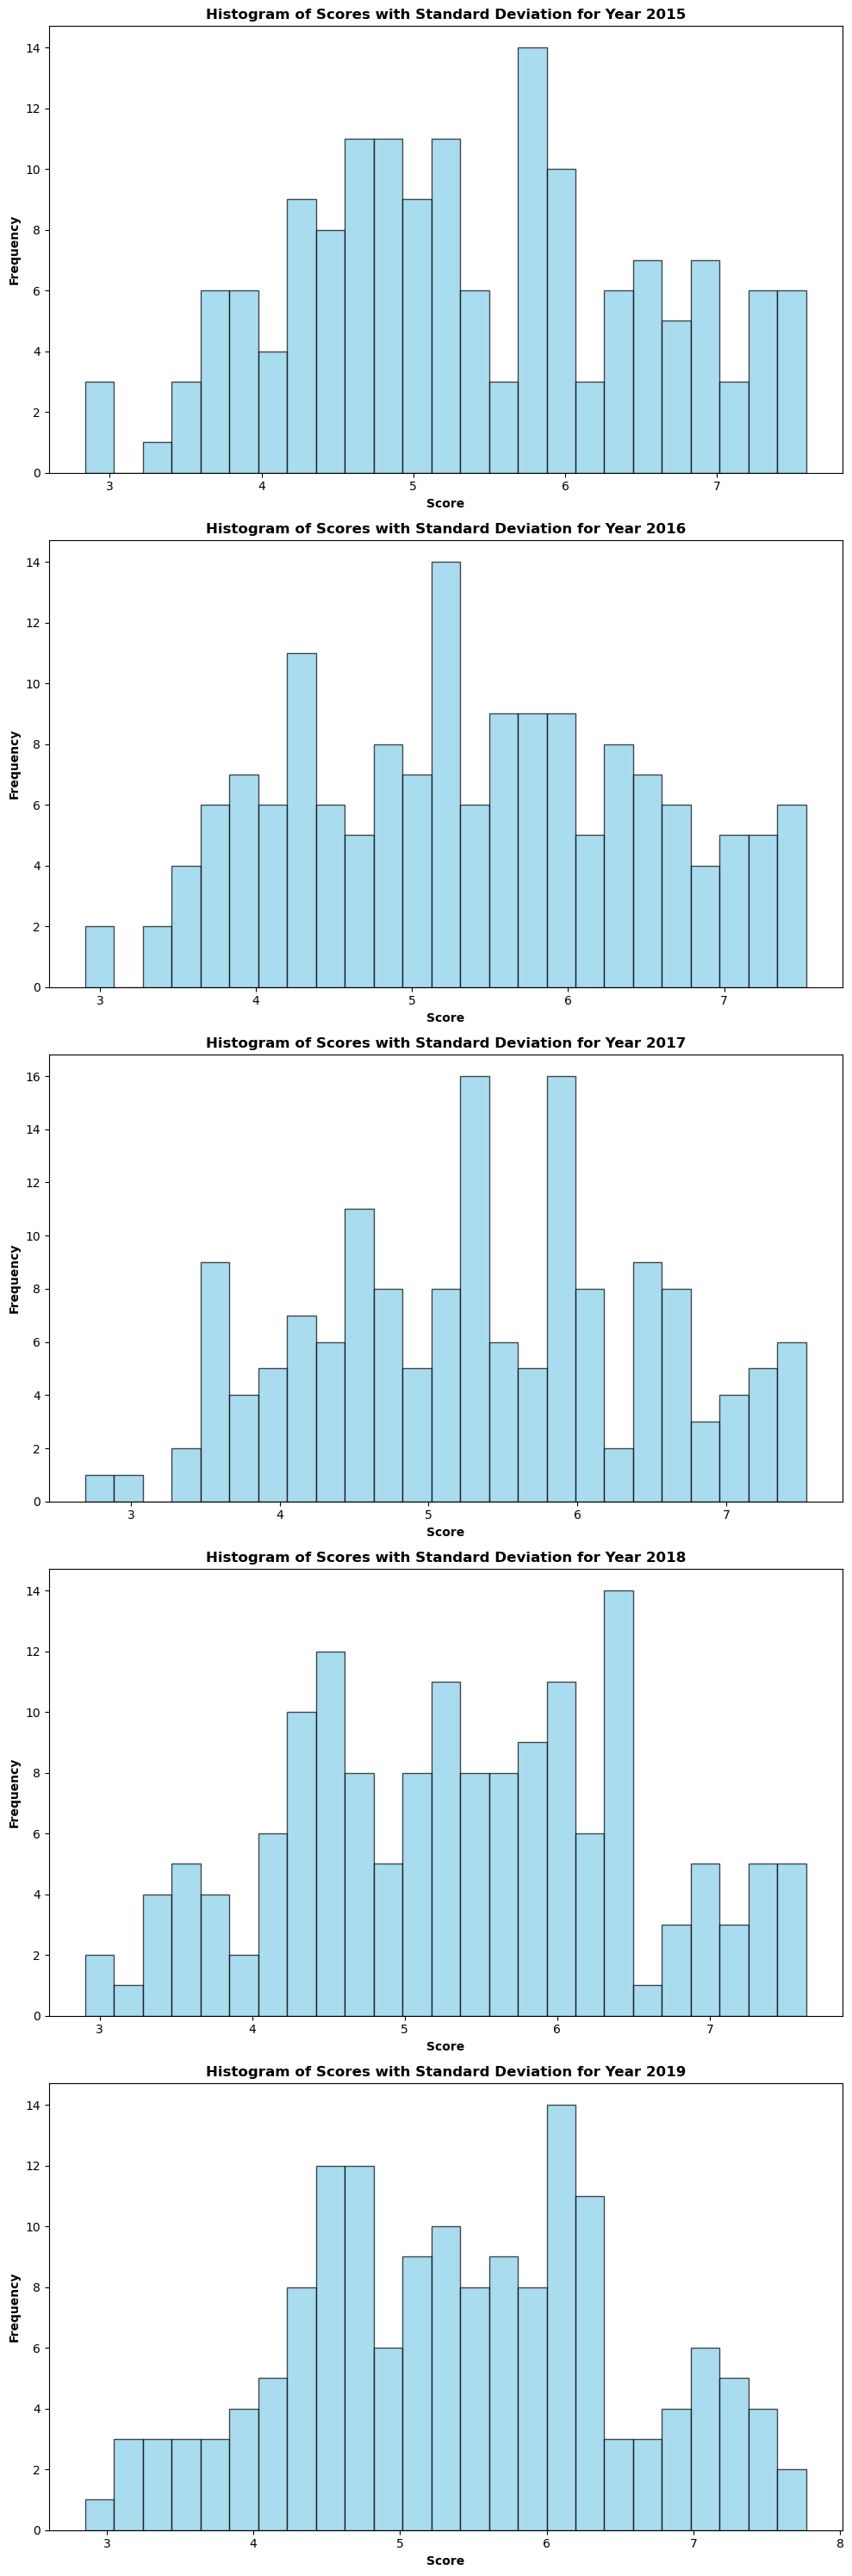

In [381]:
unique_years = merged_dfs['Year'].unique()

plt.figure(figsize=(10, 6 * len(unique_years)))

for i, year in enumerate(unique_years, 1):
    plt.subplot(len(unique_years), 1, i)
    year_data = merged_dfs[merged_dfs['Year'] == year]['Score']
    std_dev_score_year = year_data.std()
    
    plt.hist(year_data, bins=25, color='skyblue', edgecolor='black', alpha=0.7)
    
    plt.xlabel('Score', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.title(f'Histogram of Scores with Standard Deviation for Year {year}', fontweight='bold')

plt.tight_layout()
plt.show()


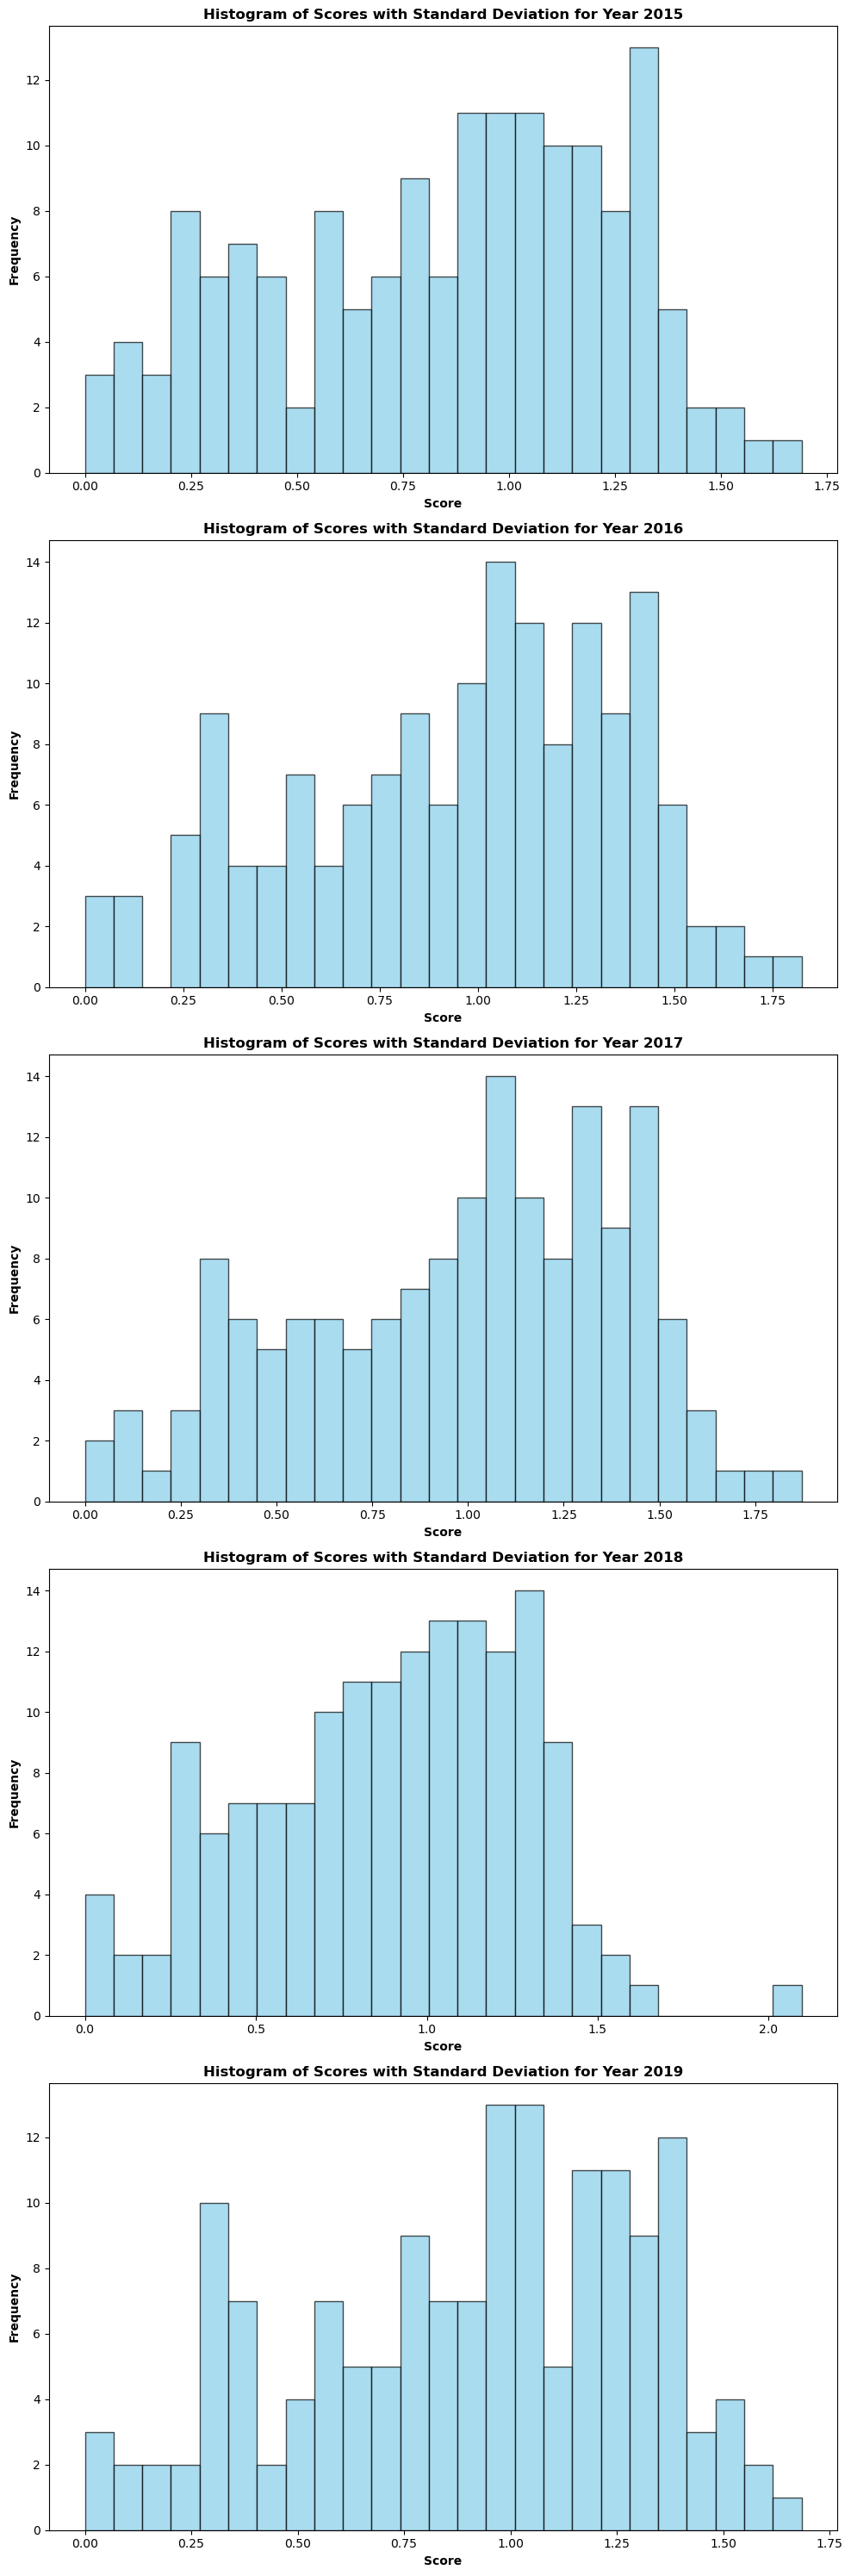

In [382]:
unique_years = merged_dfs['Year'].unique()

plt.figure(figsize=(10, 6 * len(unique_years)))

for i, year in enumerate(unique_years, 1):
    plt.subplot(len(unique_years), 1, i)
    year_data = merged_dfs[merged_dfs['Year'] == year]['GDP per capita']
    std_dev_score_year = year_data.std()
    
    plt.hist(year_data, bins=25, color='skyblue', edgecolor='black', alpha=0.7)
    
    plt.xlabel('Score', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.title(f'Histogram of Scores with Standard Deviation for Year {year}', fontweight='bold')

plt.tight_layout()
plt.show()

Outliers in Overall rank:
No outliers detected.


Outliers in Score:
No outliers detected.


Outliers in GDP per capita:
No outliers detected.


Outliers in Social support:
                      Country                           Region  Overall rank  \
147  Central African Republic               Sub-Saharan Africa           148   
157                      Togo               Sub-Saharan Africa           158   
131                    Malawi               Sub-Saharan Africa           132   
152                     Benin               Sub-Saharan Africa           153   
153               Afghanistan                    Southern Asia           154   
154                      Togo               Sub-Saharan Africa           155   
155                     Syria  Middle East and Northern Africa           156   
154  Central African Republic               Sub-Saharan Africa           155   
154  Central African Republic               Sub-Saharan Africa           155   
154  Central African Republ

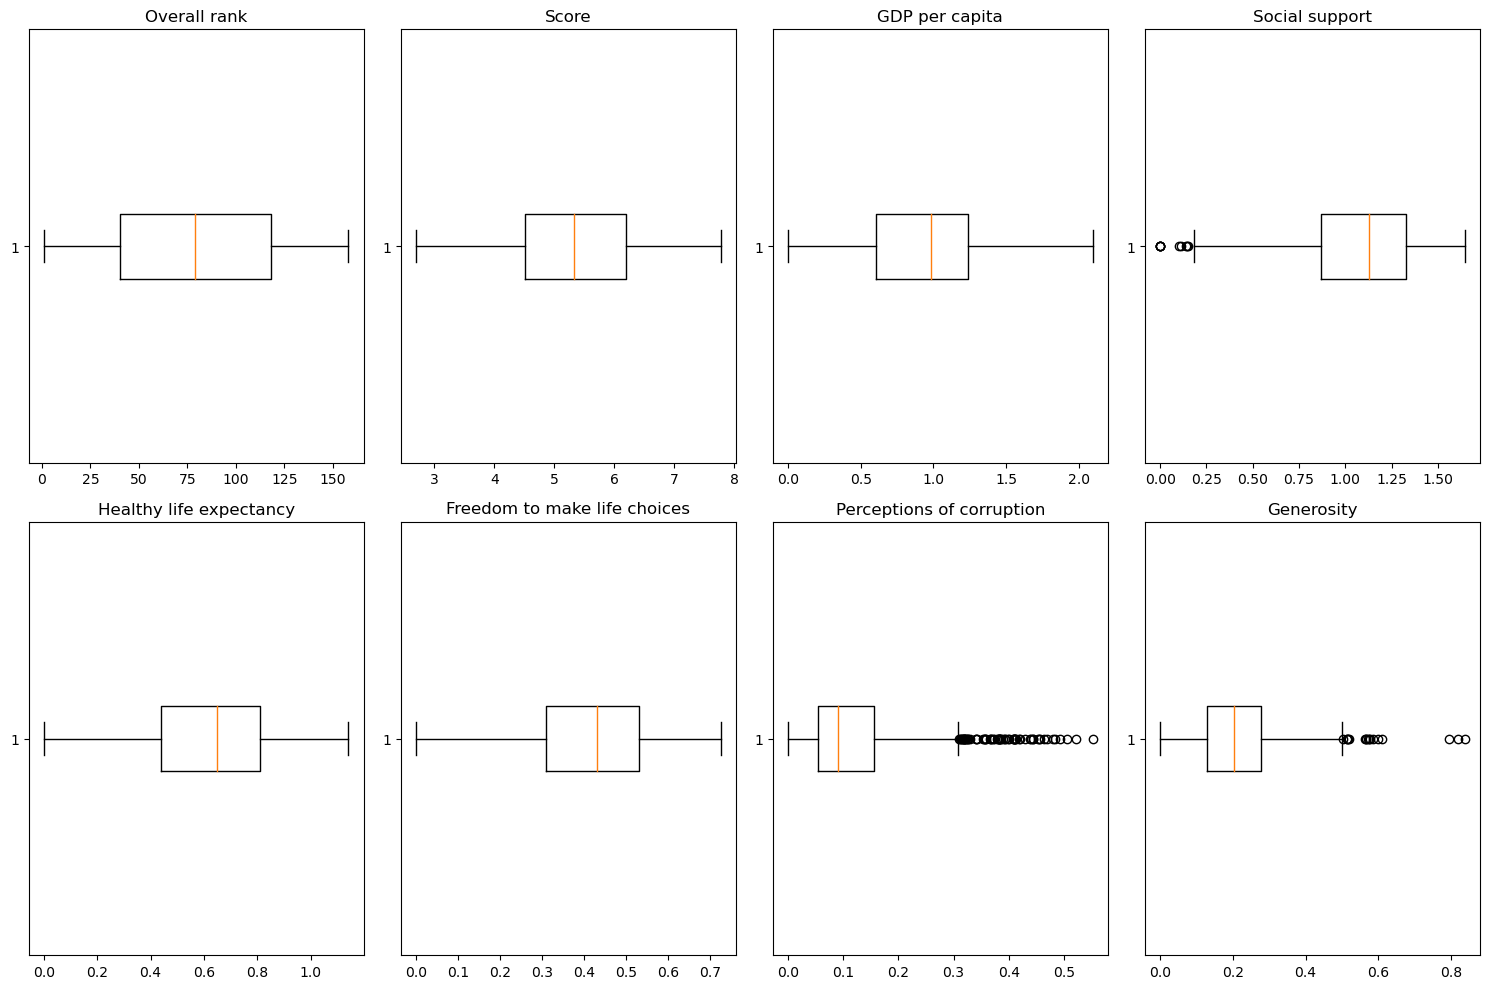

In [341]:
def find_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

numeric_columns = [
    'Overall rank',
    'Score',
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Perceptions of corruption',
    'Generosity'
]

outlier_dict = {}
for column in numeric_columns:
    outliers = find_outliers(merged_dfs, column)
    outlier_dict[column] = outliers

for column, outliers in outlier_dict.items():
    print(f"Outliers in {column}:")
    if not outliers.empty:
        print(outliers)
    else:
        print("No outliers detected.")
    print("\n")

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(merged_dfs[column], vert=False)
    plt.title(column)

plt.tight_layout()
plt.show()


In [322]:
Score_count = merged_dfs['Score'].value_counts()

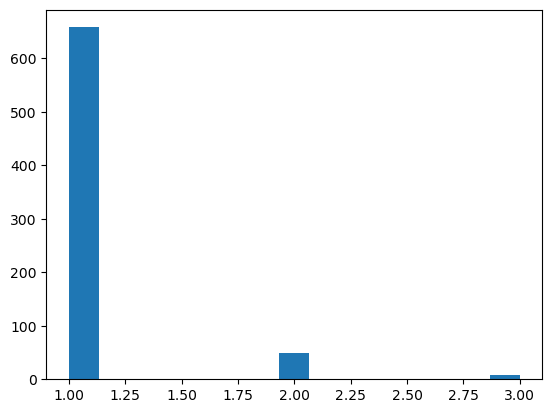

In [327]:
plt.hist(Score_count, bins=15

)

plt.show()

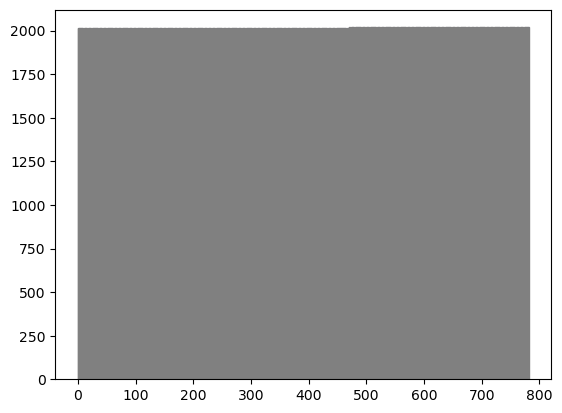

In [337]:
n_categories = len(merged_dfs['Year'])
r1 = np.arange(n_categories)

plt.bar(r1, merged_dfs['Year'], color='b', edgecolor='grey', label='Column 1')
plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

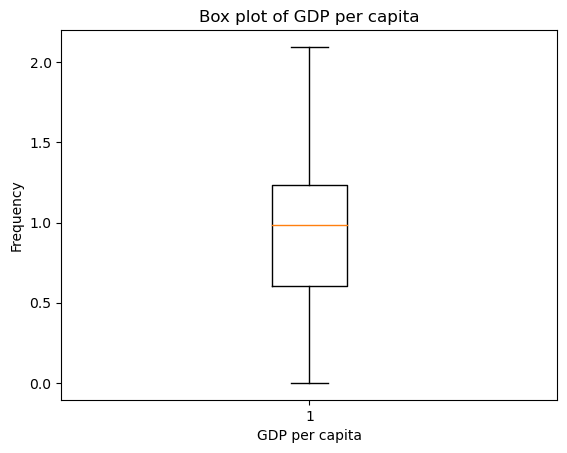

In [402]:
plt.boxplot(merged_dfs['GDP per capita'])
plt.xlabel('GDP per capita')
plt.ylabel('Frequency')
plt.title(f'Box plot of GDP per capita')
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [403]:
merged_dfs.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,782.0,78.698210,45.182384,1.000,40.000000,79.000000,118.000000,158.000000
Score,782.0,5.379018,1.127456,2.693,4.509750,5.322000,6.189500,7.769000
GDP per capita,782.0,0.916047,0.407340,0.000,0.606500,0.982205,1.236187,2.096000
Social support,782.0,1.078392,0.329548,0.000,0.869363,1.124735,1.327250,1.644000
Healthy life expectancy,782.0,0.612416,0.248309,0.000,0.440183,0.647310,0.808000,1.141000
Freedom to make life choices,782.0,0.411091,0.152880,0.000,0.309768,0.431000,0.531000,0.724000
Perceptions of corruption,782.0,0.125599,0.105847,0.000,0.054250,0.091033,0.156243,0.551910
Generosity,782.0,0.218576,0.122321,0.000,0.130000,0.201982,0.278832,0.838075
Year,782.0,2016.993606,1.417364,2015.000,2016.000000,2017.000000,2018.000000,2019.000000


In [404]:
merged_dfs.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,782,170,Switzerland,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,782,10,Sub-Saharan Africa,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall rank,782.0,NaN,NaN,NaN,78.69821,45.182384,1.0,40.0,79.0,118.0,158.0
Score,782.0,NaN,NaN,NaN,5.379018,1.127456,2.693,4.50975,5.322,6.1895,7.769
GDP per capita,782.0,NaN,NaN,NaN,0.916047,0.40734,0.0,0.6065,0.982205,1.236187,2.096
Social support,782.0,NaN,NaN,NaN,1.078392,0.329548,0.0,0.869363,1.124735,1.32725,1.644
Healthy life expectancy,782.0,NaN,NaN,NaN,0.612416,0.248309,0.0,0.440183,0.64731,0.808,1.141
Freedom to make life choices,782.0,NaN,NaN,NaN,0.411091,0.15288,0.0,0.309768,0.431,0.531,0.724
Perceptions of corruption,782.0,NaN,NaN,NaN,0.125599,0.105847,0.0,0.05425,0.091033,0.156243,0.55191
Generosity,782.0,NaN,NaN,NaN,0.218576,0.122321,0.0,0.13,0.201982,0.278832,0.838075


In [406]:
merged_dfs['GDP per capita'].mean(), merged_dfs['GDP per capita'].std()

(0.9160474824829717, 0.40734013128981933)

In [407]:
np.quantile(merged_dfs['GDP per capita'],0.25)

0.6065

In [409]:
merged_dfs['GDP per capita'].quantile(0.25)

0.6065

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

<Axes: xlabel='Country', ylabel='Count'>

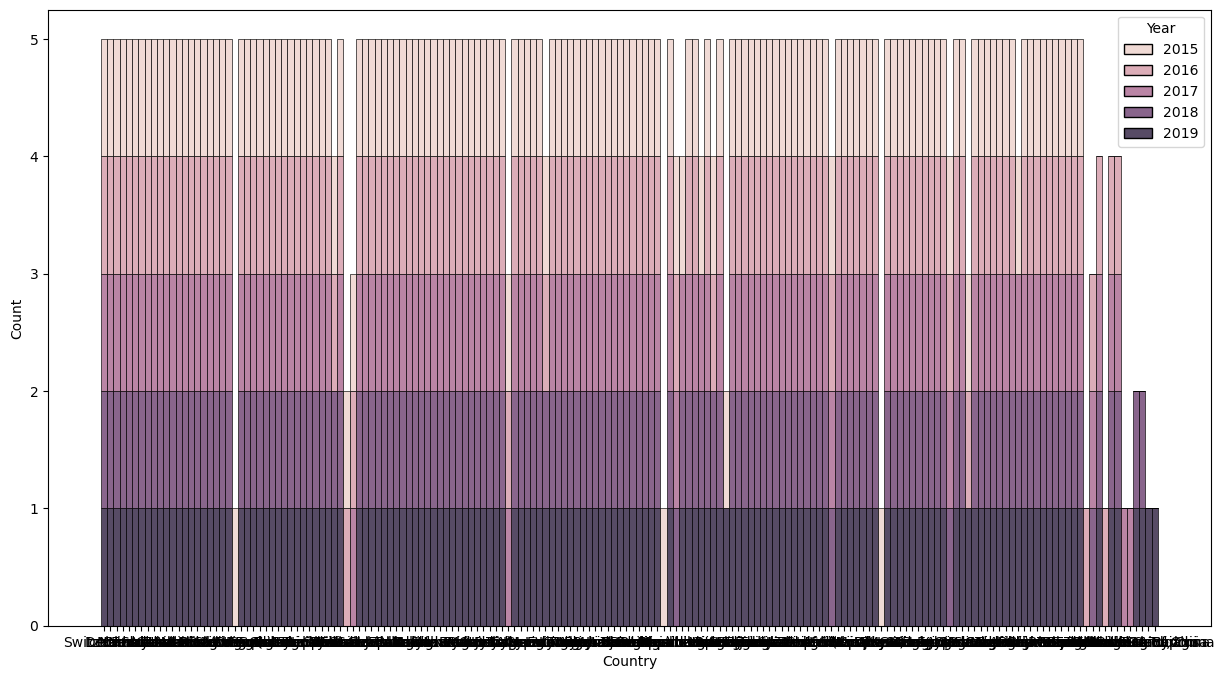

In [401]:
plt.figure(figsize=(15,8))
sns.histplot(
    merged_dfs,
    x="Country",
    hue="Year", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)


**Categorical & numerical --> (scatter plot, histogram, box plot)**

<Axes: xlabel='Score', ylabel='Count'>

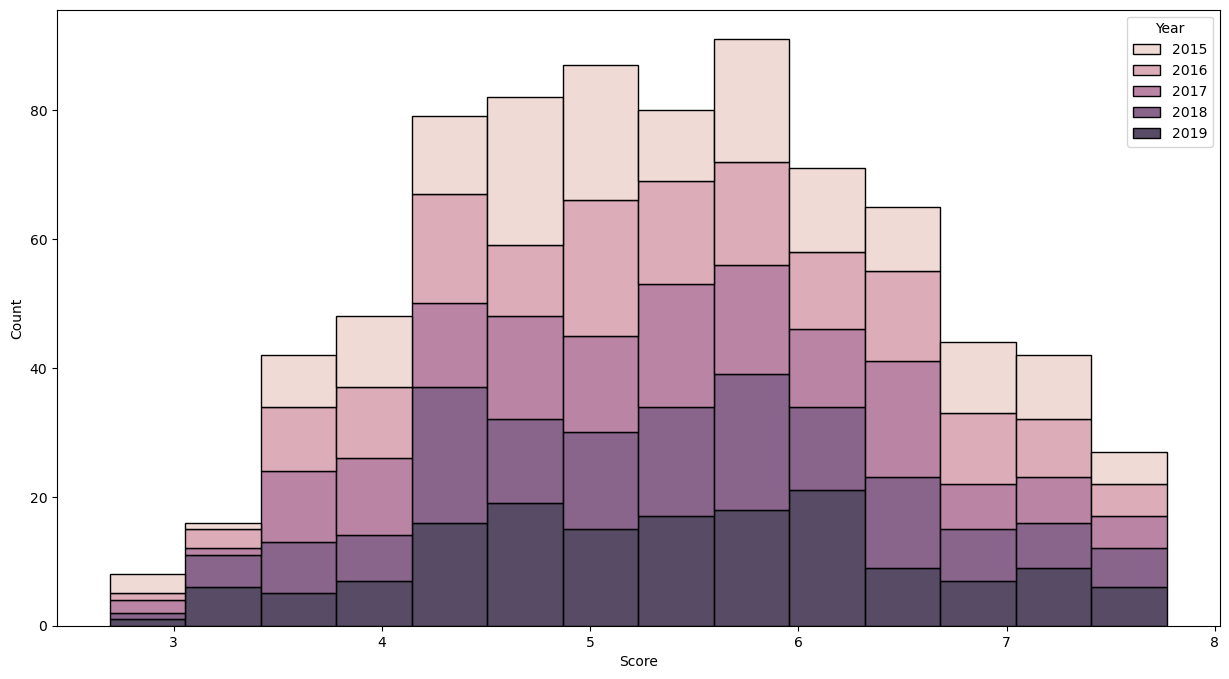

In [400]:
plt.figure(figsize=(15,8))
sns.histplot(
    merged_dfs,
    x="Score",
    hue="Year", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

**numerical & numerical --> (Scatter plot, line chart)**

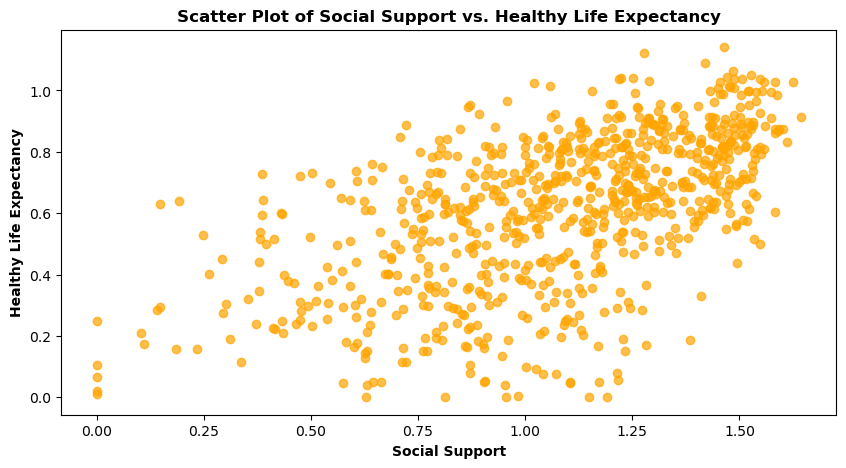

In [387]:
plt.figure(figsize=(10, 5))
plt.scatter(merged_dfs['Social support'], merged_dfs['Healthy life expectancy'], color='orange', alpha=0.7)
plt.title('Scatter Plot of Social Support vs. Healthy Life Expectancy', fontweight='bold')
plt.xlabel('Social Support', fontweight='bold')
plt.ylabel('Healthy Life Expectancy', fontweight='bold')
# plt.grid(True)
plt.show()


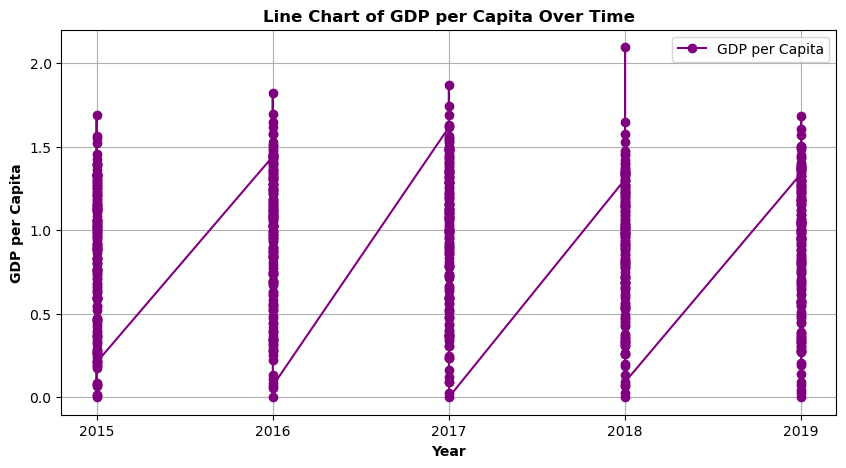

In [393]:
plt.figure(figsize=(10, 5))
plt.plot(merged_dfs['Year'], merged_dfs['GDP per capita'], marker='o', linestyle='-', color='purple', label='GDP per Capita')
plt.title('Line Chart of GDP per Capita Over Time', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('GDP per Capita', fontweight='bold')
plt.xticks(merged_dfs['Year'].unique())
plt.grid(True)
plt.legend()
plt.show()


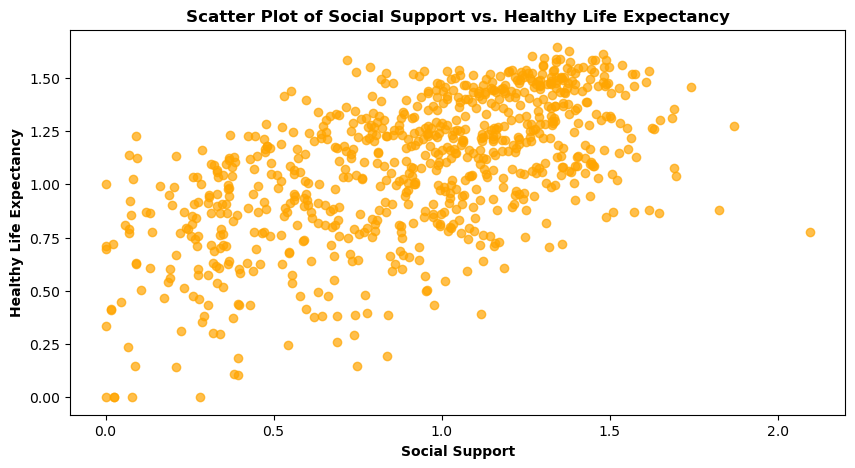

In [388]:
plt.figure(figsize=(10, 5))
plt.scatter(merged_dfs['GDP per capita'], merged_dfs['Social support'], color='orange', alpha=0.7)
plt.title('Scatter Plot of Social Support vs. Healthy Life Expectancy', fontweight='bold')
plt.xlabel('Social Support', fontweight='bold')
plt.ylabel('Healthy Life Expectancy', fontweight='bold')
# plt.grid(True)
plt.show()

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

In [384]:
merged_dfs.columns

Index(['Country', 'Region', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Generosity', 'Year'],
      dtype='object')

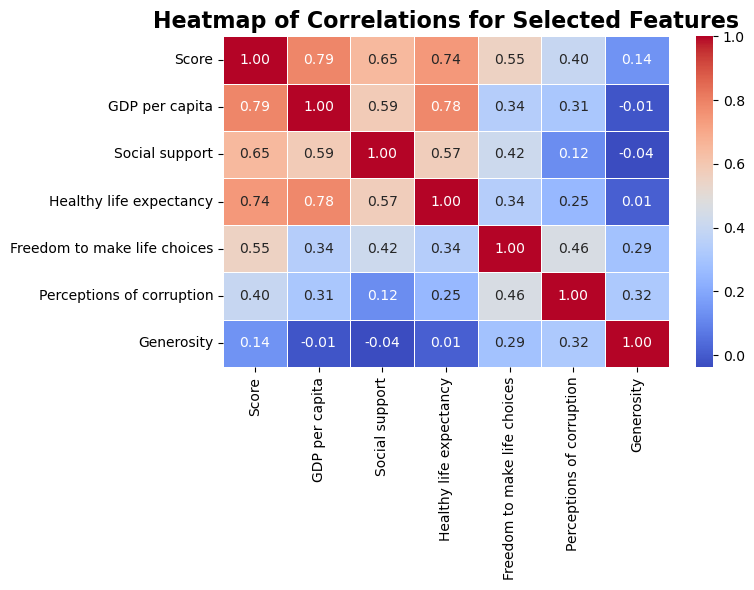

In [385]:
columns_of_interest = ['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Generosity']
subset_correlation_matrix = merged_dfs[columns_of_interest].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(subset_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)

plt.title('Heatmap of Correlations for Selected Features', fontweight='bold', fontsize=16)

plt.tight_layout()
plt.show()
